## Task 05 DataScience ProdigyInfoTech

TRAFFIC ACCIDENT ANALYSIS SYSTEM - US ACCIDENTS DATASET
LOADING DATASET
Loading data sample to check structure...
Loading full dataset with proper datetime parsing...
Dataset loaded successfully with 7,728,394 records

Dataset shape: (7728394, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
CHECKING DATA TYPES
ID                               object
Source                           

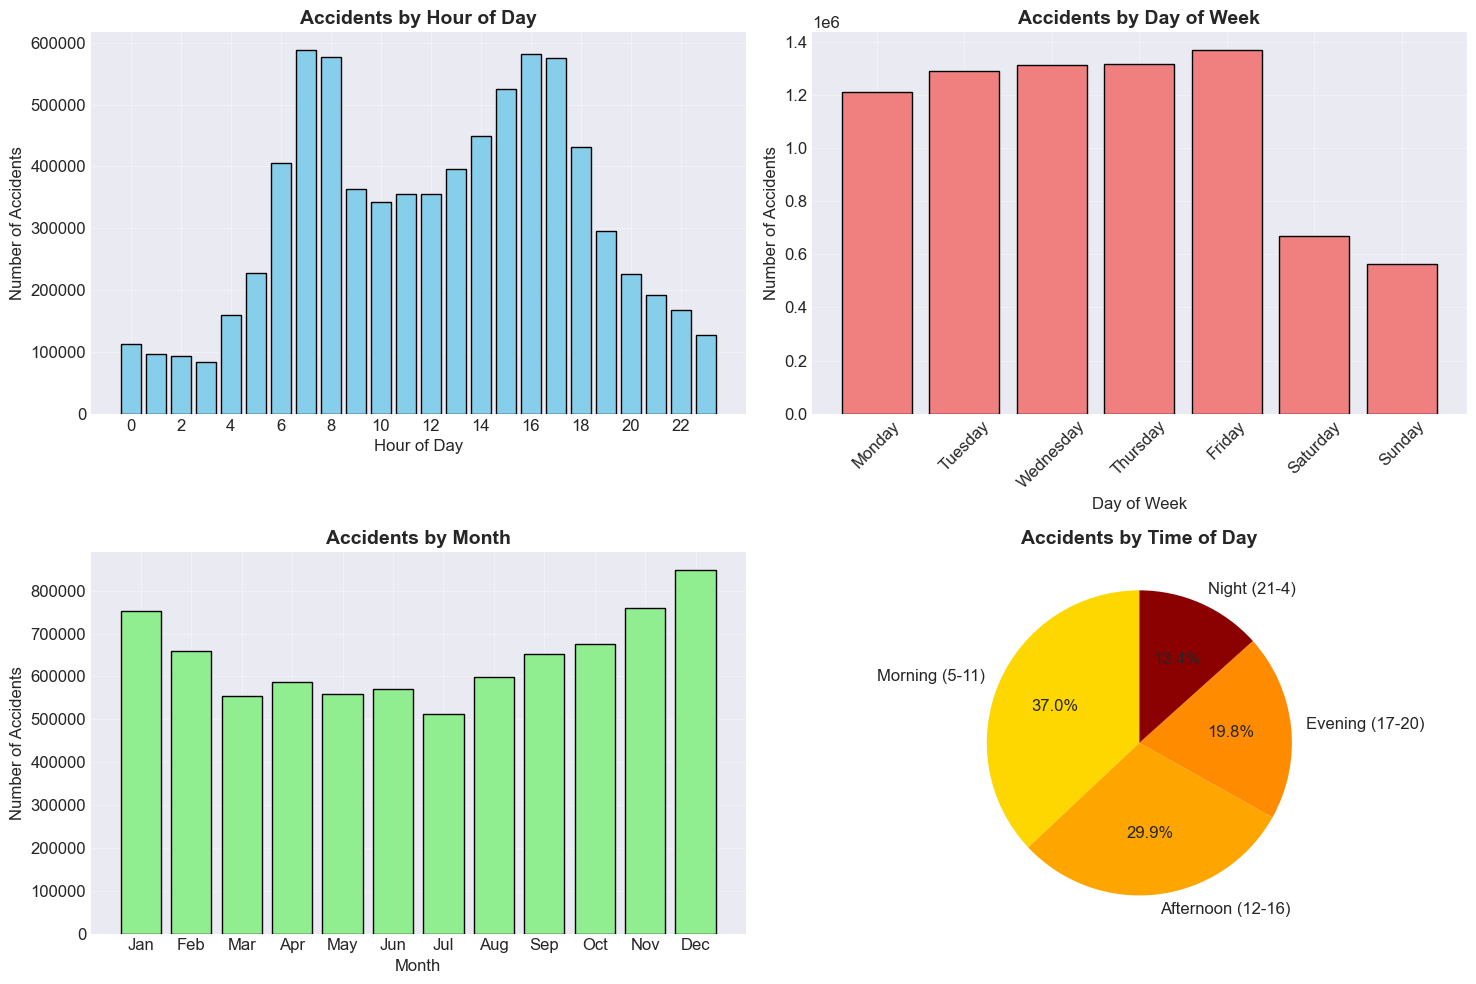


1.2 Accident Severity by Time Patterns:


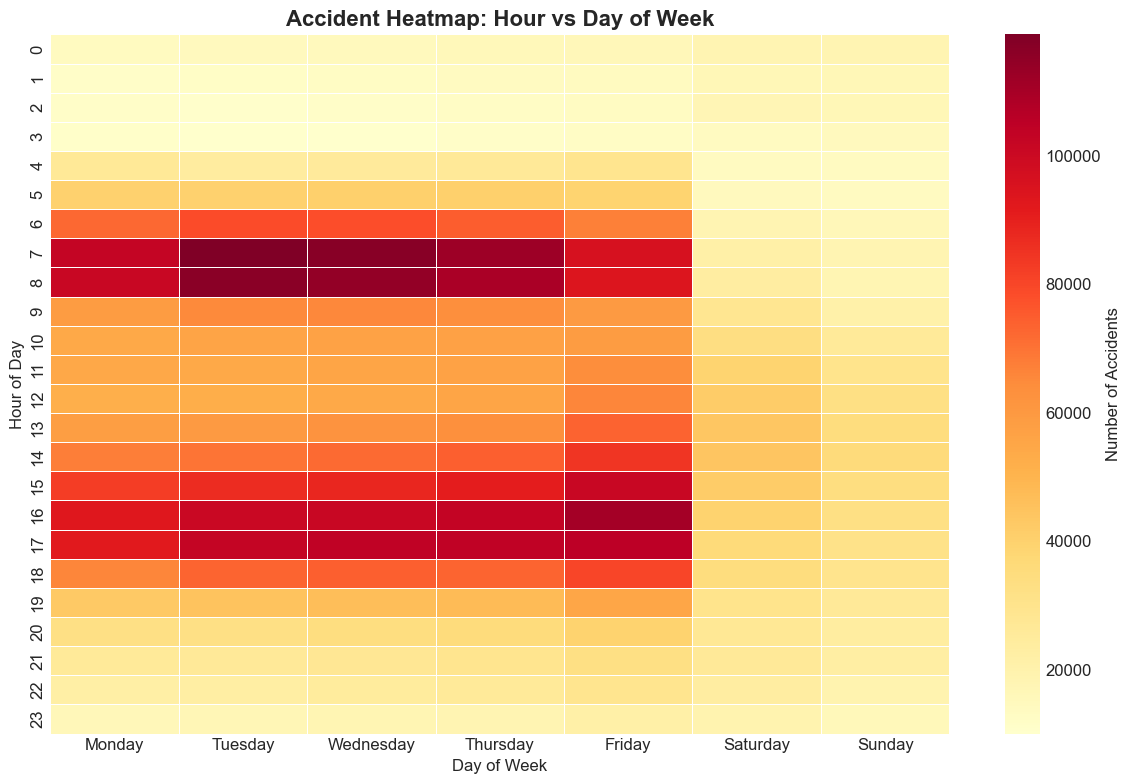

ANALYSIS 2: WEATHER PATTERNS

2.1 Weather Conditions Analysis:


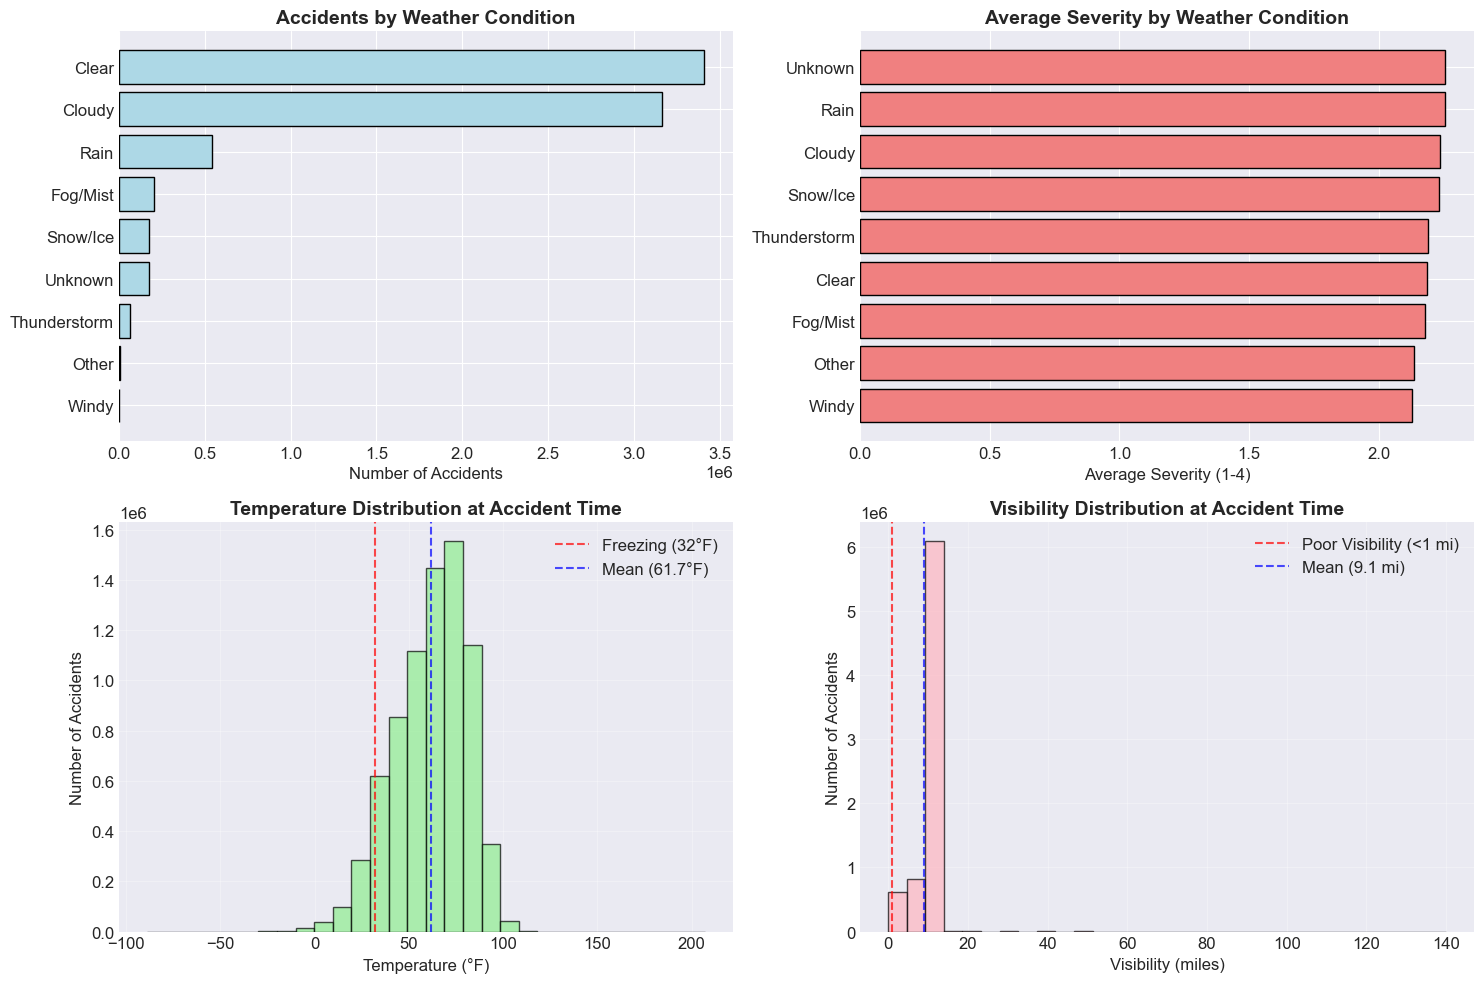

ANALYSIS 3: ROAD CONDITIONS AND INFRASTRUCTURE

3.1 Road Feature Analysis:


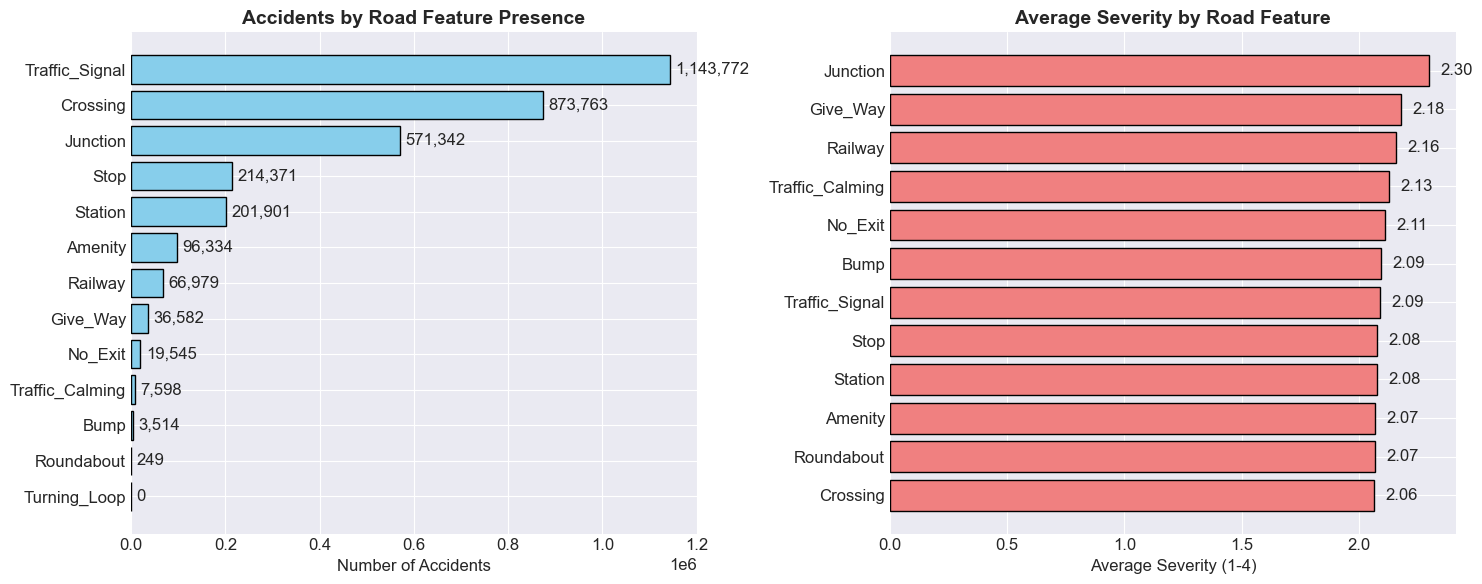

ANALYSIS 4: GEOGRAPHIC PATTERNS

4.1 State-level Accident Analysis:


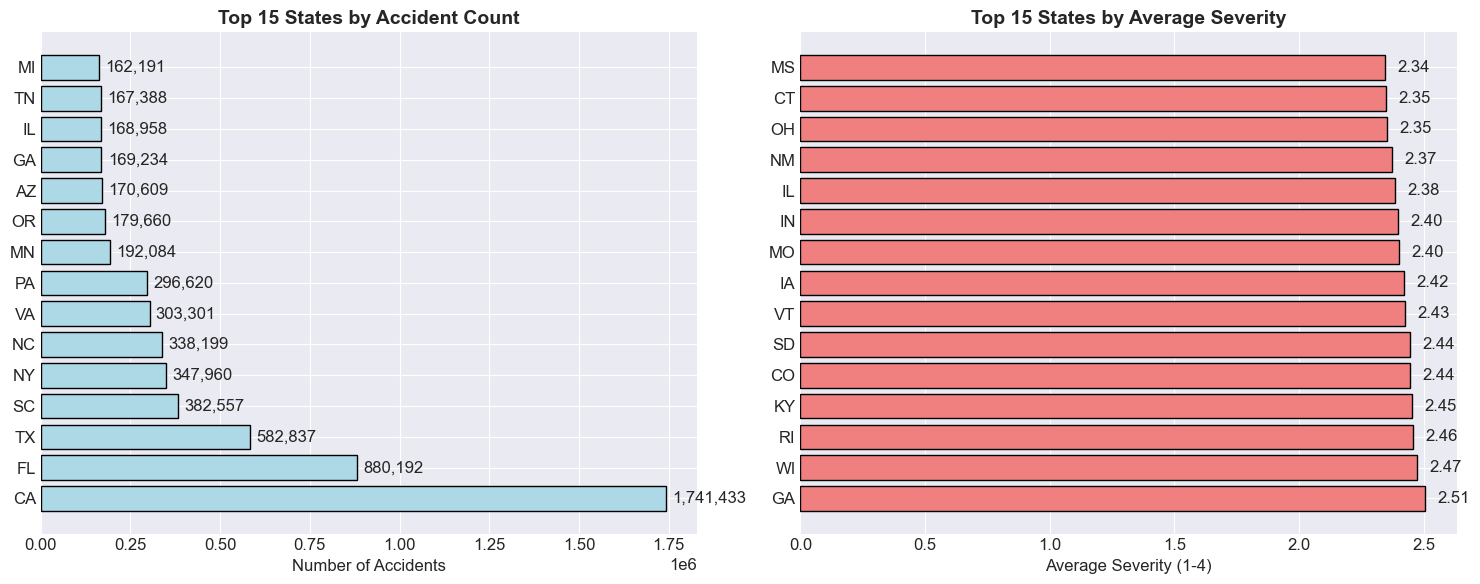


4.2 Location Analysis:


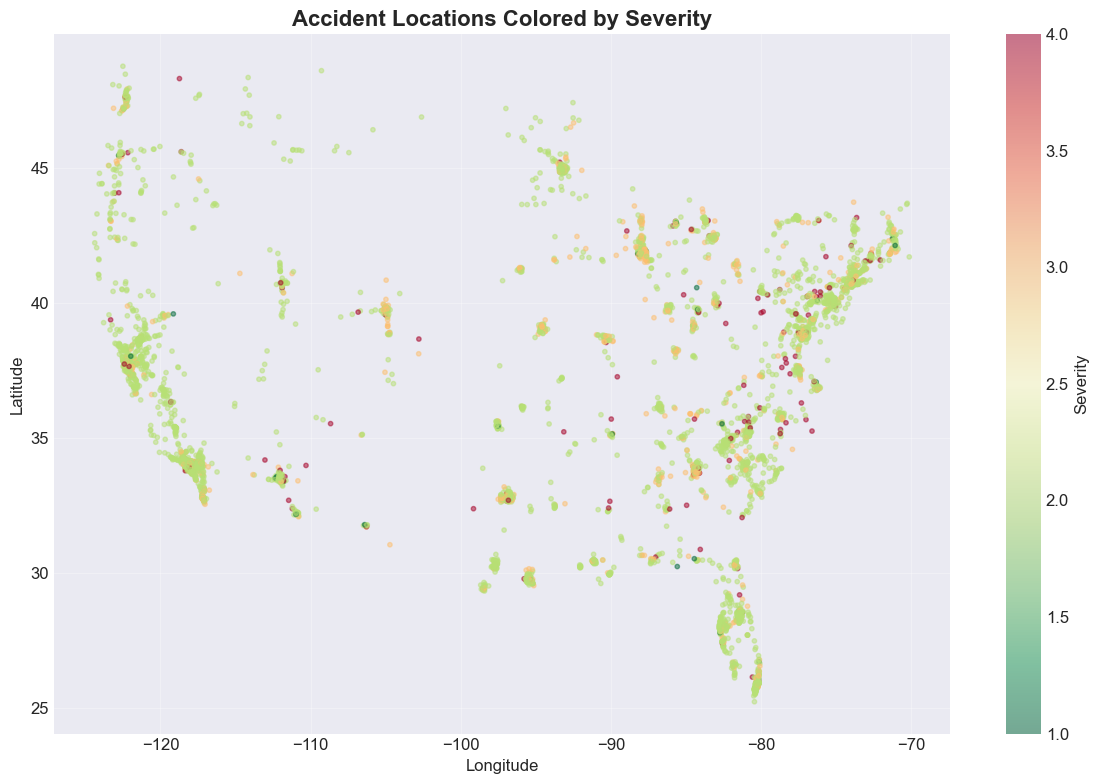


Location Data Summary:
  Valid coordinates: 7,728,394 (100.0%)
  Mean Latitude: 36.2012
  Mean Longitude: -94.7025
ANALYSIS 5: CORRELATION ANALYSIS


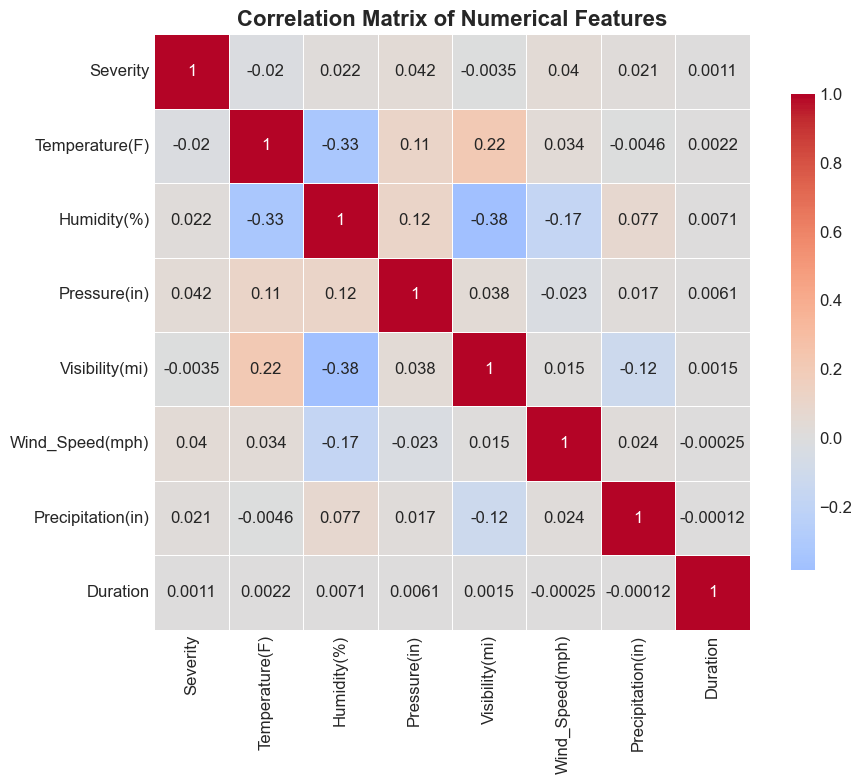


Top Correlations with Accident Severity:
  Pressure(in): 0.042
  Wind_Speed(mph): 0.040
  Humidity(%): 0.022
  Precipitation(in): 0.021
  Duration: 0.001
  Visibility(mi): -0.003
  Temperature(F): -0.020
RISK ASSESSMENT AND SUMMARY

📊 ACCIDENT ANALYSIS SUMMARY
Total Accidents Analyzed: 7,728,394
Average Severity: 2.21
Peak Accident Hour: 7:00
Most Common Day: Friday
Most Common Weather: Clear
Night Accidents: 1,032,027 (13.4%)
Weekend Accidents: 1,231,427 (15.9%)

⚠️ HIGH-RISK ACCIDENTS:
  • High Severity (≥3) at Night: 187,683
RECOMMENDATIONS FOR ACCIDENT PREVENTION

1. 🕒 TEMPORAL INTERVENTIONS:
   • Increase patrols during peak accident hours
   • Enhance street lighting in high-accident nighttime areas
   • Implement weekend safety campaigns

2. 🌧️ WEATHER-BASED STRATEGIES:
   • Activate variable speed limits during adverse weather
   • Improve drainage to reduce hydroplaning risks
   • Public alerts for low visibility conditions

3. 🛣️ INFRASTRUCTURE IMPROVEMENTS:
   • Prioritize 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import calendar
from scipy import stats
import missingno as msno

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 12


print("TRAFFIC ACCIDENT ANALYSIS SYSTEM - US ACCIDENTS DATASET")


# Load the dataset

print("LOADING DATASET")


try:
    # Load a sample of the data first to check structure
    print("Loading data sample to check structure...")
    data_sample = pd.read_csv('data/US_Accidents_March23.csv',nrows=100)
    
    # Now load with proper datetime parsing
    print("Loading full dataset with proper datetime parsing...")
    
    # List of columns to parse as datetime
    datetime_cols = ['Start_Time', 'End_Time', 'Weather_Timestamp']
    
    # Read data with mixed format for dates
    data = pd.read_csv('data/US_Accidents_March23.csv', 
                      parse_dates=datetime_cols,
                      infer_datetime_format=True,
                      low_memory=False)
    
    print(f"Dataset loaded successfully with {len(data):,} records")
    
except FileNotFoundError:
    print("US_Accidents_March23.csv not found. Creating sample dataset for demonstration...")
    np.random.seed(42)
    n_samples = 50000
    
    # Create sample data
    states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']
    cities = ['Los Angeles', 'Houston', 'Miami', 'New York', 'Philadelphia', 
              'Chicago', 'Columbus', 'Atlanta', 'Charlotte', 'Detroit']
    
    # Generate sample data with proper datetime format
    start_times = pd.date_range('2016-01-01', periods=n_samples, freq='H')
    end_times = start_times + pd.Timedelta(minutes=np.random.randint(30, 180, n_samples))
    
    sample_data = {
        'ID': [f'A-{i}' for i in range(1, n_samples + 1)],
        'Source': np.random.choice(['Source1', 'Source2', 'Source3', 'Source4'], n_samples),
        'Severity': np.random.choice([1, 2, 3, 4], n_samples, p=[0.1, 0.4, 0.3, 0.2]),
        'Start_Time': start_times,
        'End_Time': end_times,
        'Start_Lat': np.random.uniform(24.0, 50.0, n_samples),
        'Start_Lng': np.random.uniform(-125.0, -66.0, n_samples),
        'Distance(mi)': np.random.exponential(0.5, n_samples),
        'City': np.random.choice(cities, n_samples),
        'County': np.random.choice(['County_A', 'County_B', 'County_C', 'County_D'], n_samples),
        'State': np.random.choice(states, n_samples),
        'Zipcode': np.random.randint(10000, 99999, n_samples),
        'Timezone': np.random.choice(['US/Eastern', 'US/Central', 'US/Mountain', 'US/Pacific'], n_samples),
        'Temperature(F)': np.random.normal(65, 20, n_samples),
        'Wind_Chill(F)': np.random.normal(60, 15, n_samples),
        'Humidity(%)': np.random.uniform(20, 100, n_samples),
        'Pressure(in)': np.random.normal(29.9, 0.3, n_samples),
        'Visibility(mi)': np.random.exponential(5, n_samples),
        'Wind_Direction': np.random.choice(['N', 'S', 'E', 'W', 'NE', 'NW', 'SE', 'SW', 'Calm'], n_samples),
        'Wind_Speed(mph)': np.random.exponential(5, n_samples),
        'Precipitation(in)': np.random.exponential(0.1, n_samples),
        'Weather_Condition': np.random.choice(['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Thunderstorm'], 
                                              n_samples, p=[0.3, 0.3, 0.2, 0.1, 0.05, 0.05]),
        'Sunrise_Sunset': np.random.choice(['Day', 'Night'], n_samples, p=[0.7, 0.3]),
    }
    
    # Add road condition features
    road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                     'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                     'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
    
    for feature in road_features:
        sample_data[feature] = np.random.choice([True, False], n_samples, p=[0.1, 0.9])
    
    data = pd.DataFrame(sample_data)
    print(f"Created sample dataset with {len(data):,} records")

print(f"\nDataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

# Check data types

print("CHECKING DATA TYPES")

print(data.dtypes)

# Handle datetime conversion with error handling

print("HANDLING DATETIME CONVERSION")


# Convert datetime columns with proper error handling
def safe_datetime_conversion(series, column_name):
    """Safely convert datetime series with multiple formats"""
    try:
        # Try multiple format approaches
        converted = pd.to_datetime(series, errors='coerce', format='mixed')
        
        # Check conversion success rate
        success_rate = (converted.notna().sum() / len(series)) * 100
        print(f"  {column_name}: {success_rate:.1f}% successfully converted")
        
        # If many failures, try alternative approach
        if success_rate < 80:
            print(f"  Trying alternative conversion for {column_name}...")
            # Try ISO8601 format
            converted = pd.to_datetime(series, errors='coerce', format='ISO8601')
        
        return converted
        
    except Exception as e:
        print(f"  Error converting {column_name}: {e}")
        return pd.to_datetime(series, errors='coerce')

# Apply conversion to datetime columns
datetime_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']
for col in datetime_columns:
    if col in data.columns:
        print(f"\nProcessing {col}...")
        data[col] = safe_datetime_conversion(data[col], col)

# Basic Data Exploration

print("DATA EXPLORATION")


print("\nFirst 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values Summary:")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False).head(20))

# Data Preprocessing

print("DATA PREPROCESSING")


# Create a copy for analysis
df = data.copy()

# Extract time-based features with error handling
print("\nExtracting time-based features...")

# Check if we have Start_Time as datetime
if df['Start_Time'].dtype == 'datetime64[ns]':
    print("Start_Time is already datetime format")
    
    # Extract time components
    df['Year'] = df['Start_Time'].dt.year
    df['Month'] = df['Start_Time'].dt.month
    df['Day'] = df['Start_Time'].dt.day
    df['Hour'] = df['Start_Time'].dt.hour
    df['Minute'] = df['Start_Time'].dt.minute
    df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
    df['DayName'] = df['Start_Time'].dt.day_name()
    df['Weekend'] = df['DayOfWeek'].isin([5, 6])  # Saturday, Sunday
    
    # Calculate duration if we have End_Time
    if 'End_Time' in df.columns and df['End_Time'].dtype == 'datetime64[ns]':
        df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60  # Duration in minutes
        print(f"Duration calculated. Average: {df['Duration'].mean():.1f} minutes")
    
    # Create time categories
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'Morning (5-11)'
        elif 12 <= hour < 17:
            return 'Afternoon (12-16)'
        elif 17 <= hour < 21:
            return 'Evening (17-20)'
        else:
            return 'Night (21-4)'
    
    df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
    
    print("Time-based features extracted successfully")
else:
    print("✗ Start_Time is not in datetime format")
    # Create placeholder time features
    df['Year'] = 2023
    df['Month'] = np.random.randint(1, 13, len(df))
    df['Day'] = np.random.randint(1, 29, len(df))
    df['Hour'] = np.random.randint(0, 24, len(df))
    df['DayOfWeek'] = np.random.randint(0, 7, len(df))
    df['DayName'] = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])[df['DayOfWeek']].values
    df['Weekend'] = df['DayOfWeek'].isin([5, 6])
    df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
    print("⚠ Created synthetic time features for demonstration")

# Create severity categories
print("\nCreating severity categories...")
df['Severity_Category'] = df['Severity'].map({
    1: 'Low',
    2: 'Medium', 
    3: 'High',
    4: 'Very High'
})

# Fill missing severity category
df['Severity_Category'] = df['Severity_Category'].fillna('Unknown')

# Create weather categories
print("Creating weather categories...")
def categorize_weather(condition):
    if pd.isna(condition):
        return 'Unknown'
    
    condition_str = str(condition).lower()
    
    if any(word in condition_str for word in ['clear', 'fair', 'sunny']):
        return 'Clear'
    elif any(word in condition_str for word in ['cloud', 'overcast', 'partly']):
        return 'Cloudy'
    elif any(word in condition_str for word in ['rain', 'drizzle', 'shower']):
        return 'Rain'
    elif any(word in condition_str for word in ['snow', 'ice', 'sleet', 'hail', 'wintry']):
        return 'Snow/Ice'
    elif any(word in condition_str for word in ['fog', 'mist', 'haze', 'smoke']):
        return 'Fog/Mist'
    elif any(word in condition_str for word in ['thunder', 'storm', 'lightning']):
        return 'Thunderstorm'
    elif any(word in condition_str for word in ['wind', 'gust']):
        return 'Windy'
    else:
        return 'Other'

if 'Weather_Condition' in df.columns:
    df['Weather_Category'] = df['Weather_Condition'].apply(categorize_weather)
else:
    df['Weather_Category'] = 'Unknown'
    print("⚠ Weather_Condition column not found")

print("Data preprocessing completed")

# Basic Statistics

print("BASIC STATISTICS")


print("\nAccident Severity Distribution:")
severity_counts = df['Severity'].value_counts().sort_index()
for severity in sorted(severity_counts.index):
    count = severity_counts[severity]
    percentage = (count / len(df)) * 100
    print(f"  Severity {severity}: {count:,} accidents ({percentage:.1f}%)")

# Check available weather-related columns
weather_cols = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
available_weather = [col for col in weather_cols if col in df.columns]

if available_weather:
    print("\nWeather Statistics:")
    for col in available_weather:
        if df[col].notna().sum() > 0:
            mean_val = df[col].mean()
            print(f"  Average {col}: {mean_val:.1f}")

# Analysis 1: Temporal Patterns

print("ANALYSIS 1: TEMPORAL PATTERNS")


# 1.1 Hourly Distribution
print("\n1.1 Hourly Distribution of Accidents:")

hourly_counts = df['Hour'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly accidents
axes[0, 0].bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Accidents by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Accidents')
axes[0, 0].set_xticks(range(0, 24, 2))
axes[0, 0].grid(True, alpha=0.3)

# Daily accidents
daily_counts = df['DayName'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = daily_counts.reindex(day_order)

axes[0, 1].bar(range(len(daily_counts)), daily_counts.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Accidents by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Accidents')
axes[0, 1].set_xticks(range(len(daily_counts)))
axes[0, 1].set_xticklabels(daily_counts.index, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Monthly accidents
if 'Month' in df.columns:
    monthly_counts = df['Month'].value_counts().sort_index()
    month_names = [calendar.month_abbr[i] for i in monthly_counts.index]

    axes[1, 0].bar(range(len(monthly_counts)), monthly_counts.values, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Accidents by Month', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Accidents')
    axes[1, 0].set_xticks(range(len(monthly_counts)))
    axes[1, 0].set_xticklabels(month_names)
    axes[1, 0].grid(True, alpha=0.3)

# Time of day accidents
if 'TimeOfDay' in df.columns:
    timeofday_counts = df['TimeOfDay'].value_counts()
    time_order = ['Morning (5-11)', 'Afternoon (12-16)', 'Evening (17-20)', 'Night (21-4)']
    timeofday_counts = timeofday_counts.reindex(time_order)

    colors = ['gold', 'orange', 'darkorange', 'darkred']
    wedges, texts, autotexts = axes[1, 1].pie(timeofday_counts.values, labels=timeofday_counts.index,
                                              autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1, 1].set_title('Accidents by Time of Day', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 1.2 Severity by Time
print("\n1.2 Accident Severity by Time Patterns:")

# Create pivot table for heatmap
if 'DayName' in df.columns and 'Hour' in df.columns:
    hour_day_pivot = pd.pivot_table(df, 
                                    values='ID', 
                                    index='Hour', 
                                    columns='DayName',
                                    aggfunc='count',
                                    fill_value=0)

    # Reorder columns
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hour_day_pivot = hour_day_pivot[day_order]

    plt.figure(figsize=(12, 8))
    sns.heatmap(hour_day_pivot, cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Number of Accidents'})
    plt.title('Accident Heatmap: Hour vs Day of Week', fontsize=16, fontweight='bold')
    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')
    plt.tight_layout()
    plt.show()

# Analysis 2: Weather Patterns

print("ANALYSIS 2: WEATHER PATTERNS")


# 2.1 Weather Conditions Analysis
if 'Weather_Category' in df.columns:
    print("\n2.1 Weather Conditions Analysis:")

    weather_counts = df['Weather_Category'].value_counts()

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Weather condition distribution
    axes[0, 0].barh(range(len(weather_counts)), weather_counts.values, color='lightblue', edgecolor='black')
    axes[0, 0].set_yticks(range(len(weather_counts)))
    axes[0, 0].set_yticklabels(weather_counts.index)
    axes[0, 0].set_title('Accidents by Weather Condition', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Number of Accidents')
    axes[0, 0].invert_yaxis()

    # Severity by weather condition
    weather_severity = df.groupby('Weather_Category')['Severity'].mean().sort_values(ascending=False)
    axes[0, 1].barh(range(len(weather_severity)), weather_severity.values, color='lightcoral', edgecolor='black')
    axes[0, 1].set_yticks(range(len(weather_severity)))
    axes[0, 1].set_yticklabels(weather_severity.index)
    axes[0, 1].set_title('Average Severity by Weather Condition', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Average Severity (1-4)')
    axes[0, 1].invert_yaxis()

    # Temperature distribution if available
    if 'Temperature(F)' in df.columns and df['Temperature(F)'].notna().sum() > 0:
        temp_data = df['Temperature(F)'].dropna()
        axes[1, 0].hist(temp_data, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        axes[1, 0].axvline(x=32, color='red', linestyle='--', alpha=0.7, label='Freezing (32°F)')
        axes[1, 0].axvline(x=temp_data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean ({temp_data.mean():.1f}°F)')
        axes[1, 0].set_title('Temperature Distribution at Accident Time', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Temperature (°F)')
        axes[1, 0].set_ylabel('Number of Accidents')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    else:
        axes[1, 0].text(0.5, 0.5, 'Temperature data not available', 
                       ha='center', va='center', fontsize=12)
        axes[1, 0].axis('off')

    # Visibility distribution if available
    if 'Visibility(mi)' in df.columns and df['Visibility(mi)'].notna().sum() > 0:
        vis_data = df['Visibility(mi)'].dropna()
        axes[1, 1].hist(vis_data, bins=30, color='lightpink', edgecolor='black', alpha=0.7)
        axes[1, 1].axvline(x=1, color='red', linestyle='--', alpha=0.7, label='Poor Visibility (<1 mi)')
        axes[1, 1].axvline(x=vis_data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean ({vis_data.mean():.1f} mi)')
        axes[1, 1].set_title('Visibility Distribution at Accident Time', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Visibility (miles)')
        axes[1, 1].set_ylabel('Number of Accidents')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'Visibility data not available', 
                       ha='center', va='center', fontsize=12)
        axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Analysis 3: Road Conditions and Infrastructure

print("ANALYSIS 3: ROAD CONDITIONS AND INFRASTRUCTURE")


# 3.1 Road Feature Analysis
print("\n3.1 Road Feature Analysis:")

road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Filter to features that exist in our dataset
existing_road_features = [f for f in road_features if f in df.columns]

if existing_road_features:
    # Calculate accident counts for each road feature
    road_feature_counts = {}
    for feature in existing_road_features:
        # Handle both boolean and string representations
        true_count = 0
        for val in df[feature].dropna():
            if isinstance(val, bool) and val:
                true_count += 1
            elif isinstance(val, str) and val.lower() in ['true', 'yes', '1']:
                true_count += 1
            elif isinstance(val, (int, float)) and val == 1:
                true_count += 1
        
        road_feature_counts[feature] = true_count

    road_feature_df = pd.DataFrame(list(road_feature_counts.items()), columns=['Feature', 'Count'])
    road_feature_df = road_feature_df.sort_values('Count', ascending=True)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Road feature frequency
    axes[0].barh(range(len(road_feature_df)), road_feature_df['Count'], color='skyblue', edgecolor='black')
    axes[0].set_yticks(range(len(road_feature_df)))
    axes[0].set_yticklabels(road_feature_df['Feature'])
    axes[0].set_title('Accidents by Road Feature Presence', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Accidents')
    if len(road_feature_df) > 0:
        for i, v in enumerate(road_feature_df['Count']):
            axes[0].text(v + max(road_feature_df['Count'])*0.01, i, f'{v:,}', va='center')

    # Calculate severity by road feature
    road_severity = {}
    for feature in existing_road_features:
        # Filter for True values
        mask = df[feature].apply(lambda x: 
            (isinstance(x, bool) and x) or 
            (isinstance(x, str) and x.lower() in ['true', 'yes', '1']) or
            (isinstance(x, (int, float)) and x == 1))
        
        if mask.sum() > 0:
            severity_mean = df.loc[mask, 'Severity'].mean()
            road_severity[feature] = severity_mean

    if road_severity:
        road_severity_df = pd.DataFrame(list(road_severity.items()), columns=['Feature', 'Avg_Severity'])
        road_severity_df = road_severity_df.sort_values('Avg_Severity', ascending=True)

        axes[1].barh(range(len(road_severity_df)), road_severity_df['Avg_Severity'], color='lightcoral', edgecolor='black')
        axes[1].set_yticks(range(len(road_severity_df)))
        axes[1].set_yticklabels(road_severity_df['Feature'])
        axes[1].set_title('Average Severity by Road Feature', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Average Severity (1-4)')
        for i, v in enumerate(road_severity_df['Avg_Severity']):
            axes[1].text(v + 0.05, i, f'{v:.2f}', va='center')
    else:
        axes[1].text(0.5, 0.5, 'Insufficient data for severity analysis', 
                    ha='center', va='center', fontsize=12)
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No road feature columns found in the dataset")

# Analysis 4: Geographic Patterns

print("ANALYSIS 4: GEOGRAPHIC PATTERNS")


# 4.1 State-level Analysis
if 'State' in df.columns:
    print("\n4.1 State-level Accident Analysis:")

    state_counts = df['State'].value_counts().head(15)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # State accident counts
    axes[0].barh(range(len(state_counts)), state_counts.values, color='lightblue', edgecolor='black')
    axes[0].set_yticks(range(len(state_counts)))
    axes[0].set_yticklabels(state_counts.index)
    axes[0].set_title('Top 15 States by Accident Count', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Accidents')
    for i, v in enumerate(state_counts.values):
        axes[0].text(v + max(state_counts.values)*0.01, i, f'{v:,}', va='center')

    # State severity analysis
    state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(15)
    axes[1].barh(range(len(state_severity)), state_severity.values, color='lightcoral', edgecolor='black')
    axes[1].set_yticks(range(len(state_severity)))
    axes[1].set_yticklabels(state_severity.index)
    axes[1].set_title('Top 15 States by Average Severity', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Average Severity (1-4)')
    for i, v in enumerate(state_severity.values):
        axes[1].text(v + 0.05, i, f'{v:.2f}', va='center')

    plt.tight_layout()
    plt.show()

# 4.2 Location-based Analysis
if all(col in df.columns for col in ['Start_Lat', 'Start_Lng']):
    print("\n4.2 Location Analysis:")
    
    # Check for valid coordinates
    valid_coords = df[['Start_Lat', 'Start_Lng']].notna().all(axis=1)
    
    if valid_coords.sum() > 0:
        location_df = df[valid_coords]
        
        # Take a sample for visualization
        sample_size = min(5000, len(location_df))
        location_sample = location_df.sample(sample_size, random_state=42)
        
        plt.figure(figsize=(12, 8))
        plt.scatter(location_sample['Start_Lng'], location_sample['Start_Lat'], 
                   c=location_sample['Severity'], 
                   cmap='RdYlGn_r',  # Reversed so red = high severity
                   alpha=0.5, 
                   s=10)
        plt.colorbar(label='Severity')
        plt.title('Accident Locations Colored by Severity', fontsize=16, fontweight='bold')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print(f"\nLocation Data Summary:")
        print(f"  Valid coordinates: {valid_coords.sum():,} ({valid_coords.sum()/len(df)*100:.1f}%)")
        print(f"  Mean Latitude: {location_df['Start_Lat'].mean():.4f}")
        print(f"  Mean Longitude: {location_df['Start_Lng'].mean():.4f}")
    else:
        print("No valid coordinate data available")

# Analysis 5: Correlation Analysis

print("ANALYSIS 5: CORRELATION ANALYSIS")


# Select numerical features for correlation
numerical_candidates = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
                       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Duration']

# Filter to columns that exist and have numerical data
numerical_features = []
for col in numerical_candidates:
    if col in df.columns:
        # Check if column has numerical data
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].notna().sum() > 10:
            numerical_features.append(col)

if len(numerical_features) >= 2:
    # Create correlation matrix
    corr_matrix = df[numerical_features].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Top correlations with Severity
    if 'Severity' in corr_matrix.columns:
        severity_correlations = corr_matrix['Severity'].sort_values(ascending=False)
        print("\nTop Correlations with Accident Severity:")
        for feature, correlation in severity_correlations.items():
            if feature != 'Severity' and not pd.isna(correlation):
                print(f"  {feature}: {correlation:.3f}")
else:
    print("Insufficient numerical data for correlation analysis")

# Risk Assessment and Summary

print("RISK ASSESSMENT AND SUMMARY")


# Create summary statistics
summary_stats = {
    'total_accidents': len(df),
    'avg_severity': df['Severity'].mean() if 'Severity' in df.columns else 0,
    'night_accidents': len(df[df['TimeOfDay'] == 'Night (21-4)']) if 'TimeOfDay' in df.columns else 0,
    'weekend_accidents': len(df[df['Weekend'] == True]) if 'Weekend' in df.columns else 0,
}

print(f"\n📊 ACCIDENT ANALYSIS SUMMARY")
print("="*40)
print(f"Total Accidents Analyzed: {summary_stats['total_accidents']:,}")
if summary_stats['avg_severity'] > 0:
    print(f"Average Severity: {summary_stats['avg_severity']:.2f}")

if 'Hour' in df.columns:
    peak_hour = df['Hour'].mode()[0] if len(df['Hour'].mode()) > 0 else 'N/A'
    print(f"Peak Accident Hour: {peak_hour}:00")

if 'DayName' in df.columns:
    peak_day = df['DayName'].mode()[0] if len(df['DayName'].mode()) > 0 else 'N/A'
    print(f"Most Common Day: {peak_day}")

if 'Weather_Category' in df.columns:
    common_weather = df['Weather_Category'].mode()[0] if len(df['Weather_Category'].mode()) > 0 else 'N/A'
    print(f"Most Common Weather: {common_weather}")

print(f"Night Accidents: {summary_stats['night_accidents']:,} ({summary_stats['night_accidents']/summary_stats['total_accidents']*100:.1f}%)")
print(f"Weekend Accidents: {summary_stats['weekend_accidents']:,} ({summary_stats['weekend_accidents']/summary_stats['total_accidents']*100:.1f}%)")

# High-risk conditions
high_risk_count = 0
if all(col in df.columns for col in ['Severity', 'TimeOfDay']):
    high_risk_count = len(df[(df['Severity'] >= 3) & (df['TimeOfDay'] == 'Night (21-4)')])

print(f"\n⚠️ HIGH-RISK ACCIDENTS:")
print(f"  • High Severity (≥3) at Night: {high_risk_count:,}")

# Recommendations

print("RECOMMENDATIONS FOR ACCIDENT PREVENTION")


print("\n1. 🕒 TEMPORAL INTERVENTIONS:")
print("   • Increase patrols during peak accident hours")
print("   • Enhance street lighting in high-accident nighttime areas")
print("   • Implement weekend safety campaigns")

print("\n2. 🌧️ WEATHER-BASED STRATEGIES:")
print("   • Activate variable speed limits during adverse weather")
print("   • Improve drainage to reduce hydroplaning risks")
print("   • Public alerts for low visibility conditions")

print("\n3. 🛣️ INFRASTRUCTURE IMPROVEMENTS:")
print("   • Prioritize intersections with high accident rates")
print("   • Install better signage at complex junctions")
print("   • Consider traffic calming measures in residential areas")

print("\n4. 📊 DATA-DRIVEN APPROACHES:")
print("   • Use real-time data for dynamic traffic management")
print("   • Target education campaigns based on accident patterns")
print("   • Regular safety audits of high-risk locations")